7 Zéro de fonctions


 Méthode de Newton en une dimension

a)
Écrivons une fonction `newton1d(F, DF, x0, eps=1e-10, N=1000)` qui pour une fonction $F$, sa dérivée $F^\prime$ et une valeur initiale $x_0$ données calcule les itérations de Newton jusqu'à ce que  $|F(x_{i})| < \varepsilon$ et retourne $x_{i}$. Si $N$ itérations n'ont pas suffi à atteindre ce critère de convergence, alors ça retourne une erreur.

In [2]:
import numpy as np

def newton1d(F, DF, x0, eps=1e-10, N=1000):
    x=x0
    i=0
    while (np.abs(F(x))> eps):
        if (DF(x)==0):
            return "La dérivé s'annule autour de x0"
        x= x- F(x)/DF(x)
        i+=1
        if (i==N):
            return "Le nombre d'itération n'est pas suffisant pour la précision demandée"
    return x

b) On teste cette fonction sur l'équation $e^{-x}=x$ : (ensuite en vérifie que la solution approché vérifie bien l'équation demandée) 

In [3]:
y=newton1d(lambda x : np.exp(-x) - x, lambda x : -np.exp(-x)- 1, 2 , 1e-10, 1000)
print(y)
print(np.exp(-y)-y)

0.5671432903796383
4.7242432188454586e-11


c)Sans utiliser les fonctions `sqrt` et `log` ni les puissances fractionnaires, nous allons définir une fonction `racine(x,n)` qui calcule $\sqrt[n]{x}$.

In [4]:
def racine(x, n):
    f = lambda y : y**n - x
    df= lambda y : n*y**(n-1)
    return newton1d(f, df, 2 , 1e-10, 1000)

print(racine(27, 3))
print(racine(-1, 2))

3.0000000000016502
Le nombre d'itération n'est pas suffisant pour la précision demandée


Parfois, la dérivée de la fonction $F$ n'étant pas calculable analytiquement, il est alors nécessaire de l'approcher numériquement: $$
F^\prime(x_i) \approx \frac{F(x_i) - F(x_{i-1})}{x_i-x_{i-1}}
$$
ce qui mène à la méthode de la sécante: $$
x_{i+1} =  x_i - F(x_i) \frac{x_i-x_{i-1}}{F(x_i) - F(x_{i-1})} = \frac{x_{i-1}F(x_{i})-x_{i}F(x_{i-1})}{F(x_{i})-F(x_{i-1})}
$$
où $x_0$ et $x_1$ doivent être choisis.

d)
Écrivons une méthode `secant1d(F, x0, x1, eps=1e-10, N=1000)` implémentant la méthode de la sécante. Ensuite, je la teste sur l'exemple précédent.

In [5]:
def secant1d(F, x0, x1, eps= 10e-10, N=1000):
    i=0
    while (np.abs(F(x1))> eps):
        x0,x1= x1,(x0*F(x1)-x1*F(x0))/(F(x1)-F(x0))       
        i+=1
        if (i==N):
            return "Le nombre d'itération n'est pas suffisant pour la précision demandée"
    return x1

secant1d(lambda x : np.exp(-x)-x, 1, 2, 10e-10, 10)


0.5671432904419066

Méthode de Newton en plusieurs dimensions

La méthode de Newton en une dimension est facilement généralisable à plusieurs dimensions pour résoudre des équations de la forme $F(\boldsymbol{x})=\boldsymbol{0}$ où $F:\mathbb{R}^n \to \mathbb{R}^n$ est une fonction assez régulière. Conceptuellement la méthode est identique: l'équation $F(\boldsymbol{x})=\boldsymbol{0}$ est équivalente à $G(\boldsymbol{x})=\boldsymbol{x}$ avec la fonction $G$ définie par:
$$
G(\boldsymbol{x}) = \boldsymbol{x} - \big(F^\prime(\boldsymbol{x})\big)^{-1} F(\boldsymbol{x})
$$
où $F^\prime(\boldsymbol{x})$ désigne la matrice jacobienne de taille $n \times n$ de $F$ en $x$.
Ainsi les itérations de Newton s'écrivent:
$$
\boldsymbol{x}_{i+1} = \boldsymbol{x}_{i} - \big(F^\prime(\boldsymbol{x}_i)\big)^{-1} F(\boldsymbol{x}_i)
$$

a)
Écrivons une fonction `newton(F, DF, x0, eps=1e-12, N=10000)` implémentant la méthode de Newton en plus d'une dimension.

Note 1 : 
Pour avoir une performance optimale, il ne faut pas inverser la matrice jacobienne mais résoudre un système linéaire avec $F(\boldsymbol{x}_i)$ comme second membre. On va utiliser les méthodes Linalg de numpy pour résoudre le système linéaire $F'(x_i)X = F(x_i)$

Note 2: j'ai été obligé de forcer les types de DF(X) et F(X) car la méthode me renvoyait des erreurs de type.

In [35]:
def newton(F, DF, X0, eps = 10e-12, N=1000):
    i=0
    X=X0
    while (np.sum(F(X)**2)> eps):
        X -= np.linalg.solve(DF(X).astype('float'), F(X).astype('float'))
        i=i+1
        if (i==N):
            return "Le nombre d'itération n'est pas suffisant pour la précision demandée"
    return X

b)
Utilisons la fonction précédente pour résoudre le système suivant: 
$$
\begin{align*}
\cos(x) & =\sin(y)\,, & e^{-x} & =\cos(y)\,.
\end{align*}
$$

In [7]:
F = lambda X : np.array([np.cos(X[0])-np.sin(X[1]), np.exp(-X[0])-np.cos(X[1])])
DF= lambda X : np.array([[-np.sin(X[0]), -np.exp(-X[0])], [-np.cos(X[1]), np.sin(X[1])]])
print(newton(F, DF, np.array([1., 2.]), eps = 10e-12, N=1000))

[0.58853287 0.98226409]


 Attracteur de la méthode de Newton

a) Le but de cette partie est de résoudre l'équation $z^3 = 1$ dans le plan complexe à l'aide de la méthode de Newton et d’analyser vers laquelle des trois racines de l'unité la méthode va converger suivant le choix du point initial $z_0$.


J'ai fait les test pour récupérer les trois racines possibles de $z^{3}-1$

In [8]:
def newtonC(F, DF, z0, eps=1e-10, N=1000):
    z=z0
    i=0
    while (np.abs(F(z))> eps):
        if (DF(z)==0):
            return "La dérivé s'annule autour de x0"
        z= z- F(z)/DF(z)
        i+=1
        if (i==N):
            return "Le nombre d'itération n'est pas suffisant pour la précision demandée"
    return z

print(newtonC(lambda z : z**3-1, lambda z : 3*z**2, complex(1, 1)))
print(newtonC(lambda z : z**3-1, lambda z : 3*z**2, complex(-1, 1)))
print(newtonC(lambda z : z**3-1, lambda z : 3*z**2, complex(-1, -1)))


(0.9999999999999994-4.556244651765188e-16j)
(-0.4999999999999555+0.8660254037846933j)
(-0.4999999999999555-0.8660254037846933j)


b)
Déterminons pour chaque $z_0 \in \big\{x_0+iy_0: x_0\in[-3,3] \; \text{et} \; y_0\in[-3,3]\big\}$ vers quelle racine de l'unité la méthode de Newton va converger. Représenter graphiquement cet ensemble.

Note : 
La fonction `meshgrid` de Numpy peut être utile pour construire la matrice correspondant à l'ensemble des $z_0$.

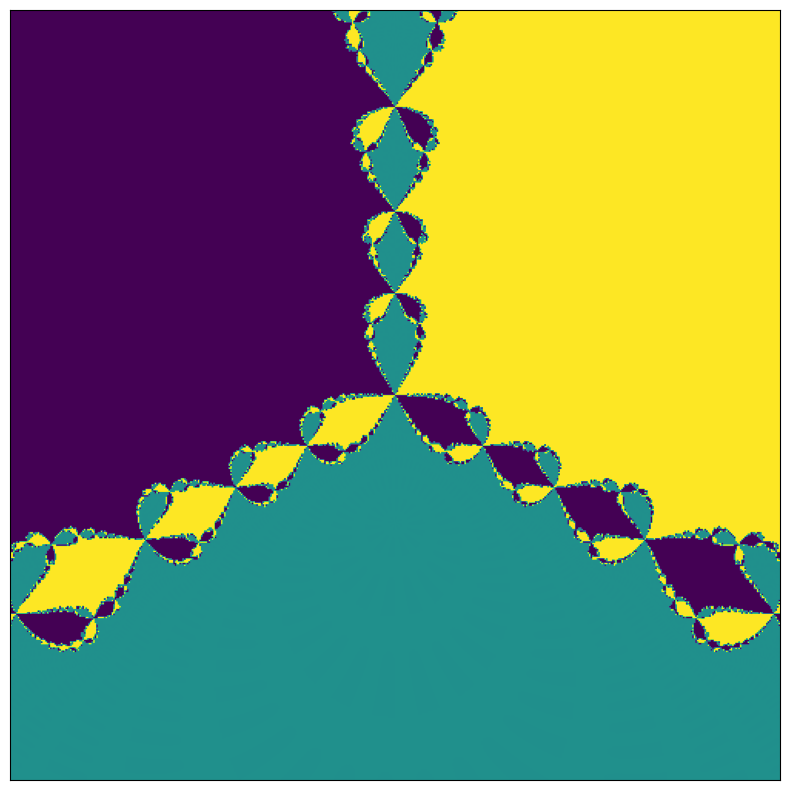

In [9]:

x = np.linspace(-3, 3, 500)
N=len(x)
fractale = np.zeros((N, N))

for i, pi in enumerate(x):
    for j, pj in enumerate(x):
        fractale[i, j]= newtonC(lambda z : z**3-1, lambda z : 3*z**2, complex(pi, pj)).imag

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(fractale)

c)La méthode précédente a le désavantage de procéder séquentiellement au calcul pour chaque valeur de $z_0$, ce qui rend cette évaluation assez lente. Proposer une nouvelle implémentation permettant de calculer parallèlement toutes les valeurs de $z_0$ en utilisant les indexages Numpy.

Note :
Pour encore plus de rapidité, les itérations de Newton de $F(z)=z^3-1$ peuvent être calculées à la main: $$
z_{n+1} = \frac{1}{3z_n^2} + \frac{2z_n}{3} \,.
$$

/tmp/ipykernel_22863/876483938.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', 4)


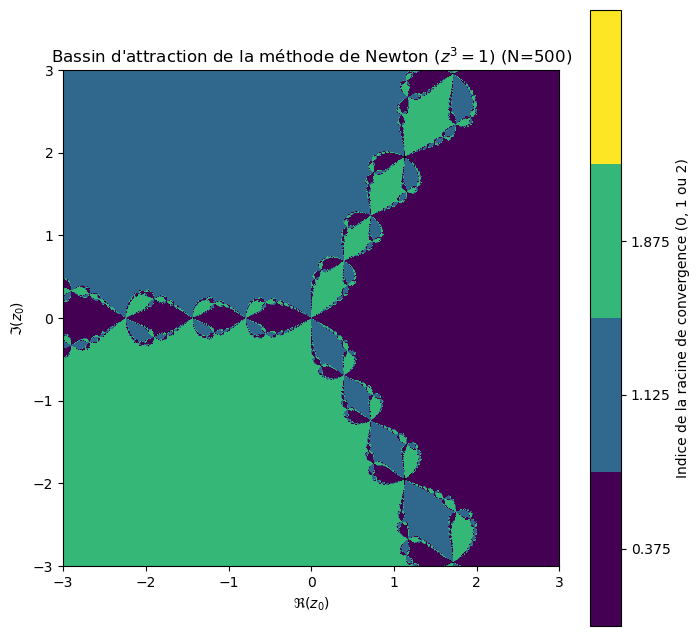

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def newton_parallel_fractal(min_re, max_re, min_im, max_im, N_points, max_iter, tolerance):
    re_vals = np.linspace(min_re, max_re, N_points)
    im_vals = np.linspace(min_im, max_im, N_points)

    Re, Im = np.meshgrid(re_vals, im_vals)
    z = Re + 1j * Im

    roots = np.array([
        1.0,
        np.cos(2*np.pi/3) + 1j*np.sin(2*np.pi/3),
        np.cos(4*np.pi/3) + 1j*np.sin(4*np.pi/3)
    ])
    convergence_map = np.full_like(z, -1, dtype=int)
    converged = np.zeros_like(z, dtype=bool)

    for n in range(max_iter):
        non_converged_mask = ~converged 
        z_to_update = z[non_converged_mask]
        
        if z_to_update.size == 0:
            break
                 
        z_next_update = (1 / (3 * z_to_update**2)) + (2 * z_to_update / 3)
        z[non_converged_mask] = z_next_update


        distance_to_roots = np.abs(z_next_update[:, np.newaxis] - roots)
        min_dist = np.min(distance_to_roots, axis=1)
        
        newly_converged_mask_update = min_dist < tolerance
        closest_root_index = np.argmin(distance_to_roots, axis=1)
        
        non_converged_flat_indices = np.flatnonzero(non_converged_mask)
        
        newly_converged_flat_indices = non_converged_flat_indices[newly_converged_mask_update]

        convergence_map.flat[newly_converged_flat_indices] = closest_root_index[newly_converged_mask_update]
        converged.flat[newly_converged_flat_indices] = True
        
    return convergence_map

fractal_map = newton_parallel_fractal(-3, 3, -3, 3, 500, 30, 1e-6)
colors = plt.cm.get_cmap('viridis', 4)
colors.set_under('k')

plt.figure(figsize=(8, 8))
plt.imshow(
    fractal_map, 
    extent=[-3, 3, -3, 3], 
    origin='lower', 
    interpolation='none',
    cmap=colors,
    vmin=0, vmax=3 
)
plt.colorbar(ticks=[0.375, 1.125, 1.875], label="Indice de la racine de convergence (0, 1 ou 2)")
plt.title(f"Bassin d'attraction de la méthode de Newton ($z^3=1$) (N={500})")
plt.xlabel(r"$\Re(z_0)$")
plt.ylabel(r"$\Im(z_0)$")
plt.show()

Équation différentielle non linéaire



Le but de cette partie est de résoudre l'équation différentielle suivante avec conditions de valeurs limites:

$$
\begin{align*}
u^{\prime\prime}(x)+u^{3}(x) & = \sin(x) \,, & u(0) & = u(2\pi) = 0 \,,
\end{align*}
$$
sur l'intervalle $[0,2\pi]$. Cette équation est un modèle simplifié pour une équation de Schrödinger non linéaire.

La méthode employée est celle des différences finies qui consistent à chercher les valeurs de $u$ aux points $x_n = \frac{2\pi n}{N}$ pour $n=0,1,\dots,N$. Les inconnues sont alors les nombres $u_n = u(x_n)$ et forment un vecteur de dimension $N+1$. La méthode des différences finies consiste à approximer la dérivée seconde par:
$$
u^{\prime\prime}(x) \approx \frac{u(x+h)-2u(x)+u(x-h)}{h^{2}} \,,
$$
lorsque $h$ est petit.
En prenant $h=\frac{2\pi}{N}$, alors:
$$
u^{\prime\prime}(x_n) \approx \frac{u_{n+1}-2u_n+u_{n-1}}{h^{2}} \,,
$$
et donc l'équation initiale s'approxime par:
$$
\begin{align*}
\frac{u_{n+1}-2u_{n}+u_{n-1}}{h^{2}}+u_{n}^{3} & = \sin(x_{n}) \,, & u_{0} & = u_{N} = 0 \,,
\end{align*}
$$
pour $n=1,2,\dots,N-1$.
Cette équation peut être vue comme une équation du type $F(\boldsymbol{u})=\boldsymbol{0}$ pour $\boldsymbol{u} = (u_n)_ {n=0}^{N+1}$ et donc être résolue par la méthode de Newton.

a)
Montrons l'approximation suivante:
$$
u^{\prime\prime}(x) = \frac{u(x+h)-2u(x)+u(x-h)}{h^{2}} + O(h^2) \quad \text{lorsque} \quad h \to 0 \,.
$$

Par le théorème de Taylor-Young, en supposant que $u$ est au moins $C^{3}$, on a, lorsque $ h \rightarrow 0$ : 
$$ u(x+h) = u(x) + hu'(x) + \frac{h^{2}}{2}u''(x) + \frac{h^{3}}{6}u'''(x) + O(h^{4}) $$ et 
$$ u(x-h) = u(x) - hu'(x) + \frac{h^{2}}{2}u''(x) - \frac{h^{3}}{6}u'''(x) + O(h^{4}) $$ d'où, en sommant les deux lignes : 
$$ u(x+h)+u(x-h)=2u(x) + h^{2}u''(x) + O(h^{4})$$ et en réarangeant on trouve le résultat demandé ( car $ \frac{O(h^{4})}{h^{2}} = O(h^{2}))$ .


b)
Définissons un vecteur `x` représentant les $N+1$ points équidistribués dans $[0,2\pi]$ et `h` la distance entre les points, avec par exemple $N=200$.

In [13]:
N= 200
x= np.linspace(0, 2*np.pi, N+1)
h=2*np.pi/N

c)
Définissons une fonction `F(u)` représentant la fonction $F:\mathbb{R}^{N+1} \to \mathbb{R}^{N+1}$ permettant de mettre l'équation approchée sous la forme $F(\boldsymbol{u})=\boldsymbol{0}$.

Note : 
Pour avoir une implémentation rapide, il est impératif pour construire $F$ d'utiliser non pas une boucle, mais le slicing Numpy.

In [37]:
def F(u):
    u_prev = np.zeros(M)
    u_prev[1:] = u[:-1]
    
    u_next = np.zeros(M)
    u_next[:-1] = u[1:]
    
    laplacian_approx = (u_next - 2 * u + u_prev) / h2
    nonlinear_term = u**3 - np.sin(x_int)
    
    return laplacian_approx + nonlinear_term 

d)
Définissons une fonction `DF(u)` représentant la jacobienne de la fonction précédente.
Note : 
La jacobienne est la dérivée de $F(\boldsymbol{u})=F(u_0,u_1,\dots,u_{N})$ par rapport à $\boldsymbol{u} = (u_0,u_1,\dots,u_{N})$, c'est-à-dire:
$$
F^{\prime}(\boldsymbol{u})=\begin{pmatrix}\partial_{0}F(\boldsymbol{u}) & \partial_{1}F(\boldsymbol{u}) & \partial_{2}F(\boldsymbol{u}) & \cdots & \partial_{N-1}F(\boldsymbol{u}) & \partial_{N}F(\boldsymbol{u})\end{pmatrix}\,,
$$
et peut se calculer explicitement à la main.

In [41]:

M = N - 1
h2 = h**2 
x_int = x[1:N]

def DF(u):
    diag_term = -2 / h2 + 3 * u**2
    off_diag_term = 1 / h2
    J = np.diag(diag_term)
    J += np.diag(np.full(M - 1, off_diag_term), k=-1)
    J += np.diag(np.full(M - 1, off_diag_term), k=1)
    
    return J


N_test = 5 
h_test = 2 * np.pi / N_test
M_test = N_test - 1
h2_test = h_test**2

u_test_internal = np.ones(M_test) * 0.5 

def DF_test(u, h2, M):
    diag_term = -2 / h2 + 3 * u**2
    off_diag_term = 1 / h2
    J = np.diag(diag_term)
    J += np.diag(np.full(M - 1, off_diag_term), k=-1)
    J += np.diag(np.full(M - 1, off_diag_term), k=1)
    return J

J_test = DF_test(u_test_internal, h2_test, M_test)

print(f"Jacobienne interne (taille {J_test.shape}):")
print(J_test)

Jacobienne interne (taille (4, 4)):
[[-0.5165148  0.6332574  0.         0.       ]
 [ 0.6332574 -0.5165148  0.6332574  0.       ]
 [ 0.         0.6332574 -0.5165148  0.6332574]
 [ 0.         0.         0.6332574 -0.5165148]]


e)
Utilisons la fonction `newton` définie précédemment pour calculer une solution approchée de l'équation. En changeant de valeurs initiales, est-il possible de trouver d'autres solutions ?

Note : 
On va essayer avec la donnée initiale $u_0(x) = (1+k)\sin(kx)$ pour $k=1,2,3,4$ comme point de départ de la méthode de Newton.

Nombre de solutions uniques trouvées : 4


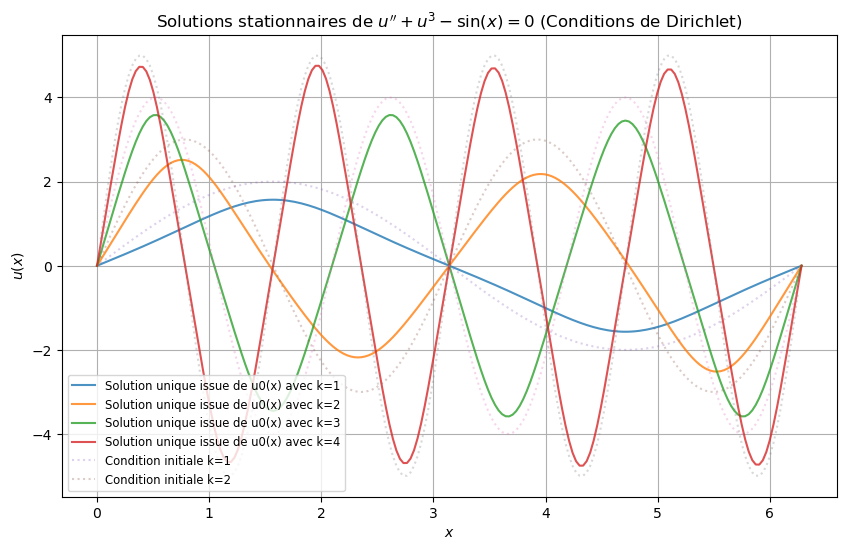

In [44]:
N = 200
h = 2 * np.pi / N
x = np.linspace(0, 2 * np.pi, N + 1)
M = N - 1
h2 = h**2
x_int = x[1:N]

def newton(u0, F, DF, max_iter=20, tolerance=1e-8): 
    """ je réimplante ici une méthode de newton raphson"""
    u = u0.copy()    
    for k in range(max_iter):
        f_val = F(u)
        res = np.linalg.norm(f_val)
        if res < tolerance:
            return u
        
        J = DF(u)
        try:
            du = np.linalg.solve(J, -f_val)
        except np.linalg.LinAlgError:
            return None
            
        u += du
        
    return None

def generate_u0(k):
    return (1 + k) * np.sin(k * x_int)

solutions = {}

for k in range(1, 5):
    u0 = generate_u0(k)
    sol = newton(u0, F, DF, N)
    
    if sol is not None:
        is_new = True
        
        for existing_sol in solutions.values():
            if np.linalg.norm(sol - existing_sol) < 1e-4:
                is_new = False
                break
            
        if is_new:
            solutions[k] = sol


print(f"Nombre de solutions uniques trouvées : {len(solutions)}")

def extend_solution(u_int):
    return np.concatenate(([0.0], u_int, [0.0]))

plt.figure(figsize=(10, 6))

if not solutions:
    plt.text(0.5, 0.5, "Aucune convergence trouvée.", transform=plt.gca().transAxes)
else:
    for k, sol in solutions.items():
        plt.plot(x, extend_solution(sol), label=f"Solution unique issue de u0(x) avec k={k}", alpha=0.8)
    
    for k in range(1, 5):
        u0_plot = generate_u0(k)
        plt.plot(x_int, u0_plot, linestyle=':', alpha=0.3, label=f"Condition initiale k={k}" if k in [1, 2] else None)


plt.title(r"Solutions stationnaires de $u'' + u^3 - \sin(x) = 0$ (Conditions de Dirichlet)")
plt.xlabel("$x$")
plt.ylabel("$u(x)$")
plt.grid(True)
plt.legend(loc='lower left', fontsize='small')
plt.savefig("solutions_newton_PDE.png")
plt.show()